In [ ]:
!pip install transformers
!pip install sentencepiece

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, AutoTokenizer

# specify GPU
device = torch.device("cuda")

In [ ]:
train_file = 'train.csv'
val_file = 'val.csv'

In [ ]:
train_data = pd.read_csv(train_file, header=0, index_col=0)
val_data = pd.read_csv(val_file, header=0, index_col=0)

In [ ]:
print(train_data.shape)
train_data.head()

(5727, 5)


,Post,Labels Set,emails,urls,Filtered_Post
Unique ID,,,,,
1,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...,"hate,offensive",[],[],मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...
2,सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...,non-hostile,[],['https://t.co/8iy2MJSBAs'],सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...
3,"सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील...",non-hostile,[],"['https://t.co/G945HvzM0Z', 'https://t.co/KfH7...","सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील..."
4,@prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं...,"defamation,offensive",[],[],@prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं...
5,#unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स...,non-hostile,[],['https://t.co/4e6lysg0VR'],#unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स...


In [ ]:
print(val_data.shape)
val_data.head()

(811, 5)


,Post,Labels Set,emails,urls,Filtered_Post
Unique ID,,,,,
1,दृढ़ इच्छा शक्ति से परिपूर्ण प्रणबदा के लिए दे...,non-hostile,[],[],दृढ़ इच्छा शक्ति से परिपूर्ण प्रणबदा के लिए दे...
2,भारतीय जनता पार्टी rss वाले इतने गिरे हुए हैं ...,defamation,[],[],भारतीय जनता पार्टी rss वाले इतने गिरे हुए हैं ...
3,कोरोना से निपटने की तैयारी / दिल्ली में 10 हजा...,non-hostile,[],['https://t.co/9rlQowAsFh'],कोरोना से निपटने की तैयारी / दिल्ली में 10 हजा...
4,गवर्नर कॉन्फ्रेंस में PM मोदी बोले- शिक्षा नीत...,non-hostile,[],['https://t.co/ZvKgxk6dbd'],गवर्नर कॉन्फ्रेंस में PM मोदी बोले- शिक्षा नीत...
5,"यूपी: गाजीपुर में Toilet घोटाला, प्रधान व सचिव...",non-hostile,[],['https://t.co/hxM1uNNmX2'],"यूपी: गाजीपुर में Toilet घोटाला, प्रधान व सचिव..."


In [ ]:
labels_set = {'defamation',
 'fake',
 'hate',
 'non-hostile',
 'offensive'}

labels_mapping = {'defamation':0,
 'fake':1,
 'hate':2,
 'non-hostile':3,
 'offensive':4}

In [ ]:
train_y = np.empty((0, 5))
for index, row in train_data.iterrows():
  y = np.zeros((1, 5))
  for label in row['Labels Set'].split(','):
    y[0, labels_mapping[label]] = 1

  train_y = np.vstack((train_y, y))


val_y = np.empty((0, 5))
for index, row in val_data.iterrows():
  y = np.zeros((1, 5))
  for label in row['Labels Set'].split(','):
    y[0, labels_mapping[label]] = 1

  val_y = np.vstack((val_y, y))


In [ ]:
y_train_hate = train_y[:,2].astype(int)
y_val_hate = val_y[:,2].astype(int)

train_sentences = train_data['Post'].values
val_sentences = val_data['Post'].values

**BERT**

In [ ]:
bert = AutoModel.from_pretrained('ai4bharat/indic-bert')
tokenizer = AutoTokenizer.from_pretrained('ai4bharat/indic-bert')

In [ ]:
# sample data
text = ["जिसमें लिखा है, काश के कश्मीर के पत्थरबाज़ इन नवजवानों से कुछ सीखते। #भारतीयसेना ।", "सुशांत के परिवार पर अब किसका 'कीचड़'?"]

# encode text
sent_id = tokenizer.batch_encode_plus(text, padding=True)

# output
print(sent_id)

{'input_ids': [[2, 18654, 670, 48660, 4384, 12, 128648, 1883, 128648, 26697, 1883, 43991, 42191, 1793, 1325, 464, 6151, 1325, 10759, 1301, 1883, 12286, 54111, 229, 15, 1078, 8297, 229, 1134, 8731, 7, 3], [2, 1301, 2700, 229, 1883, 37, 555, 37, 311, 9854, 507, 27, 507, 232, 1546, 398, 293, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}


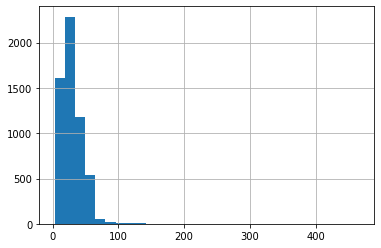

In [ ]:
seq_len = [len(i.split()) for i in train_sentences]

pd.Series(seq_len).hist(bins = 30)

In [ ]:
tokens_train = tokenizer.batch_encode_plus(
    train_sentences.tolist(),
    max_length = 100,
    pad_to_max_length=True,
    truncation=True
)

tokens_val = tokenizer.batch_encode_plus(
    val_sentences.tolist(),
    max_length = 80,
    pad_to_max_length=True,
    truncation=True
)

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2142: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(y_train_hate.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(y_val_hate.tolist())

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

In [ ]:
for param in bert.parameters():
    param.requires_grad = False

In [ ]:
class BERT_Arch(nn.Module):

    def __init__(self, bert):
      
      super(BERT_Arch, self).__init__()

      self.bert = bert 
      
      # dropout layer
      self.dropout = nn.Dropout(0.1)
      
      # relu activation function
      self.relu =  nn.ReLU()

      # dense layer 1
      self.fc1 = nn.Linear(768,512)
      
      # dense layer 2 (Output layer)
      self.fc2 = nn.Linear(512,2)

      #softmax activation function
      self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):

      #pass the inputs to the model
      state= self.bert(sent_id, attention_mask=mask)
      cls_hs = state.pooler_output
      x = self.fc1(cls_hs)

      x = self.relu(x)

      x = self.dropout(x)

      # output layer
      x = self.fc2(x)
      
      # apply softmax activation
      x = self.softmax(x)

      return x

In [ ]:
# pass the pre-trained BERT to our define architecture
model = BERT_Arch(bert)

# push the model to GPU
model = model.to(device)

In [ ]:
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(),
                  lr = 0.5e-3)          # learning rate

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

#compute the class weights
class_weights = compute_class_weight('balanced', np.unique(y_train_hate), y_train_hate)

print("Class Weights:",class_weights)

Class Weights: [0.58024316 3.6155303 ]


In [ ]:
# converting list of class weights to a tensor
weights= torch.tensor(class_weights,dtype=torch.float)

# push to GPU
weights = weights.to(device)

# define the loss function
cross_entropy  = nn.NLLLoss(weight=weights) 

# number of training epochs
epochs = 20

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
# function to train the model
def train():
  
  model.train()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save model predictions
  total_preds=[]
  
  # iterate over batches
  for step,batch in enumerate(train_dataloader):
    
    # progress update after every 50 batches.
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    # push the batch to gpu
    batch = [r.to(device) for r in batch]

    sent_id, mask, labels = batch

    # clear previously calculated gradients 
    model.zero_grad()        

    # get model predictions for the current batch
    preds = model(sent_id, mask)

    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)

    # add on to the total loss
    total_loss = total_loss + loss.item()

    # backward pass to calculate the gradients
    loss.backward()

    # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # update parameters
    optimizer.step()

    # model predictions are stored on GPU. So, push it to CPU
    preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

  # compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)
  
  # predictions are in the form of (no. of batches, size of batch, no. of classes).
  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  #returns the loss and predictions
  return avg_loss, total_preds

In [ ]:
# function for evaluating the model
def evaluate():
  
  print("\nEvaluating...")
  
  # deactivate dropout layers
  model.eval()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save the model predictions
  total_preds = []

  # iterate over batches
  for step,batch in enumerate(val_dataloader):
    
    # Progress update every 50 batches.
    if step % 50 == 0 and not step == 0:
      
      # # Calculate elapsed time in minutes.
      # elapsed = format_time(time.time() - t0)
            
      # Report progress.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

    # push the batch to gpu
    batch = [t.to(device) for t in batch]

    sent_id, mask, labels = batch

    # deactivate autograd
    with torch.no_grad():
      
      # model predictions
      preds = model(sent_id, mask)

      # compute the validation loss between actual and predicted values
      loss = cross_entropy(preds,labels)

      total_loss = total_loss + loss.item()

      preds = preds.detach().cpu().numpy()

      total_preds.append(preds)

  # compute the validation loss of the epoch
  avg_loss = total_loss / len(val_dataloader) 

  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds

In [ ]:
# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    #evaluate model
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 20
  Batch    50  of    179.
  Batch   100  of    179.
  Batch   150  of    179.

Evaluating...

Training Loss: 0.694
Validation Loss: 0.691

 Epoch 2 / 20
  Batch    50  of    179.
  Batch   100  of    179.
  Batch   150  of    179.

Evaluating...

Training Loss: 0.691
Validation Loss: 0.690

 Epoch 3 / 20
  Batch    50  of    179.
  Batch   100  of    179.
  Batch   150  of    179.

Evaluating...

Training Loss: 0.688
Validation Loss: 0.687

 Epoch 4 / 20
  Batch    50  of    179.
  Batch   100  of    179.
  Batch   150  of    179.

Evaluating...

Training Loss: 0.682
Validation Loss: 0.683

 Epoch 5 / 20
  Batch    50  of    179.
  Batch   100  of    179.
  Batch   150  of    179.

Evaluating...

Training Loss: 0.673
Validation Loss: 0.678

 Epoch 6 / 20
  Batch    50  of    179.
  Batch   100  of    179.
  Batch   150  of    179.

Evaluating...

Training Loss: 0.661
Validation Loss: 0.661

 Epoch 7 / 20
  Batch    50  of    179.
  Batch   100  of    179.
  Batch   150  

In [ ]:
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [ ]:
with torch.no_grad():
  preds = model(val_seq.to(device), val_mask.to(device))
  preds = preds.detach().cpu().numpy()

In [ ]:
preds = np.argmax(preds, axis = 1)
print(classification_report(y_val_hate, preds))

              precision    recall  f1-score   support

           0       0.93      0.65      0.76       701
           1       0.24      0.71      0.36       110

    accuracy                           0.66       811
   macro avg       0.59      0.68      0.56       811
weighted avg       0.84      0.66      0.71       811



In [ ]:
np.savetxt("y_pred_hate.csv", preds, delimiter =",", fmt ='% s')